In [8]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split        # for splitting data
from sklearn.linear_model import LinearRegression           # LinearRegression model
from sklearn.model_selection import cross_val_score         # cross-validation functionality

In [9]:
# Load the CSV file into a DataFrame
df = pd.read_csv("Salary_Data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [10]:
df = df.dropna()
df=df.drop(['Age','Gender','Education Level'],axis=1)

# Select the second column as the predictor variable (X)
X=df.iloc[:,1:2]
# Select the last column as the target variable (y)
y=df.iloc[:,-1]

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)  # Hold out 20% of data for testing, set random seed


# Create an instance of the LinearRegression model
lr = LinearRegression()

# Train the model using the training data
lr.fit(X_train, y_train)  # Fit the model to the training set

LinearRegression()

In [12]:
# Generate predictions for the testing data using the trained model
predictions = lr.predict(X_test)
predictions

array([ 79289.44495926, 121658.22711026,  72227.98126743, ...,
        65166.5175756 , 142842.61818576, 121658.22711026])

In [13]:
# Perform 3-fold cross-validation to evaluate model performance
mse = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

# Calculate the mean MSE(Mean Squared Error) across the folds
mean_mse = np.mean(mse)

print("Mean MSE:", mean_mse)

Mean MSE: -962402215.9975004


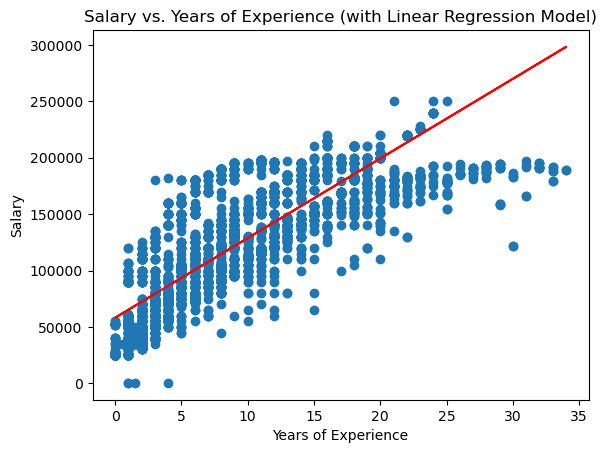

In [14]:
# Create a scatter plot of the original data
plt.scatter(df['Years of Experience'], df['Salary'], label='Original Data')

# Plot the line of best fit (linear regression model)
plt.plot(X_train, lr.predict(X_train), color='red', label='Regression Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience (with Linear Regression Model)')
plt.show()

In [15]:
X

,Years of Experience
0,5.0
1,3.0
2,15.0
3,7.0
4,20.0
...,...
6699,20.0
6700,3.0
6701,4.0
6702,14.0


In [16]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64